# Train a model on the Kaggle Bike Rental Time Series Data using XGBoost (Locally)
### This model will be trained using XGBoost locally and will be compared to training on AWS SageMaker's XGBoost algorithm

In [1]:
# Install XGBoost as needed
# !conda install -y -c conda-forge xgboost


In [52]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import xgboost as xgb


In [53]:
df_train_file = 'bikerental_train.csv' 
df_valid_file = 'bikerental_valid.csv'
df_test_file = 'bikerental_test.csv'
columns_file = 'bikerental_columns.txt'



In [54]:
# Extract columns from column file
with open(columns_file, 'r') as fh:
    columns = fh.read().split(',')

In [55]:
df_train = pd.read_csv(df_train_file,names=columns)
df_valid = pd.read_csv(df_valid_file,names=columns)

In [56]:
# Split input features and target feature for both training and validation datasets

X_train = df_train.iloc[:,1:]
y_train = df_train.iloc[:,0]

X_valid = df_valid.iloc[:,1:]
y_valid = df_valid.iloc[:,0]


### Train Model

In [57]:
xgb_regressor = xgb.XGBRegressor(max_depth=5,n_estimators=150)

In [58]:
xgb_regressor

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=5,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=150, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)

In [59]:
xgb_regressor.fit(X_train,y_train, eval_set = [(X_train, y_train), (X_valid, y_valid)])

[0]	validation_0-rmse:3.06474	validation_1-rmse:3.07849
[1]	validation_0-rmse:2.18504	validation_1-rmse:2.19653
[2]	validation_0-rmse:1.57722	validation_1-rmse:1.58869
[3]	validation_0-rmse:1.16309	validation_1-rmse:1.17612
[4]	validation_0-rmse:0.87478	validation_1-rmse:0.88953
[5]	validation_0-rmse:0.67662	validation_1-rmse:0.69381
[6]	validation_0-rmse:0.55220	validation_1-rmse:0.57248
[7]	validation_0-rmse:0.47097	validation_1-rmse:0.49356
[8]	validation_0-rmse:0.42102	validation_1-rmse:0.44553
[9]	validation_0-rmse:0.39208	validation_1-rmse:0.41922
[10]	validation_0-rmse:0.34933	validation_1-rmse:0.37767
[11]	validation_0-rmse:0.33786	validation_1-rmse:0.36829
[12]	validation_0-rmse:0.32899	validation_1-rmse:0.36133
[13]	validation_0-rmse:0.32050	validation_1-rmse:0.35353
[14]	validation_0-rmse:0.31249	validation_1-rmse:0.34607
[15]	validation_0-rmse:0.30861	validation_1-rmse:0.34211
[16]	validation_0-rmse:0.30455	validation_1-rmse:0.33776
[17]	validation_0-rmse:0.28976	validation

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=150, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
evals_result = xgb_regressor.evals_result()
training_eval = evals_result['validation_0']['rmse']
valid_eval = evals_result['validation_1']['rmse']
training_rounds = range(len(evals_result['validation_0']['rmse']))


### Visualize Results - Training Error VS Validation Error

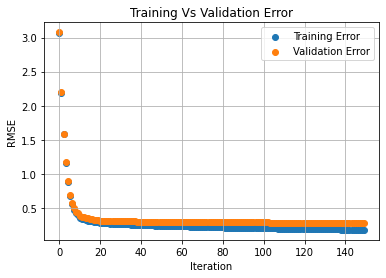

In [61]:
plt.scatter(training_rounds,y=training_eval,label='Training Error')
plt.scatter(training_rounds,y=valid_eval,label='Validation Error')
plt.xlabel('Iteration')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.grid(True)
plt.legend()
plt.show()

### Plot Feature importance with XGB Library

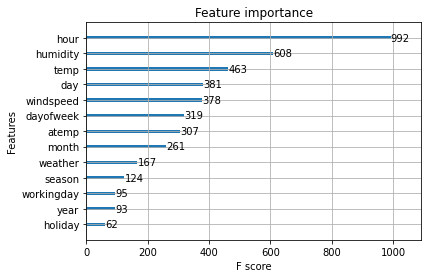

In [62]:
xgb.plot_importance(xgb_regressor)
plt.show()

### Test Model with Validation Dataset and add the predictions to df_train in order to compare

In [67]:
valid_df = pd.read_csv(df_valid_file, names = columns)
X_test = valid.iloc[:,1:]


predictions = xgb_regressor.predict(X_test)
valid_df['count_predicted'] = predictions

In [68]:
valid_df

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted
0,5.648974,4,0,0,1,-0.175949,-0.109755,-0.565702,-0.832442,2012,11,10,5,19,5.744537
1,2.833213,2,0,1,1,0.560777,0.784724,0.109828,1.127293,2012,5,17,3,4,2.072882
2,5.323010,2,0,1,1,-0.491689,-0.377626,-0.617666,2.719373,2012,4,2,0,10,5.004946
3,1.945910,3,0,1,1,0.876516,0.784724,1.097141,-1.567754,2012,8,2,3,3,2.233735
4,2.302585,1,0,1,1,-0.596935,-0.467310,-0.409811,-0.710164,2012,3,12,0,2,1.869459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3261,5.762051,3,0,1,1,0.666023,0.784724,0.161792,-0.710164,2012,9,13,3,21,5.927235
3262,1.098612,2,0,1,2,-0.175949,-0.109755,1.356960,0.514260,2012,5,3,3,4,1.990950
3263,4.543295,2,0,1,1,-0.912675,-0.824865,-0.461775,-0.465608,2011,4,1,4,21,4.452695
3264,4.919981,2,0,1,2,-0.175949,-0.109755,1.356960,-0.220230,2012,5,3,3,6,4.952785


### Ensure there are no values less than 0 in count or predicted

In [74]:
valid_df[['count','count_predicted']].describe()

,count,count_predicted
count,3266.000000,3266.000000
mean,4.606776,4.606630
std,1.405332,1.373666
min,0.693147,0.656184
25%,3.828641,3.813720
50%,4.997212,5.005123
75%,5.666427,5.636905
max,6.878326,6.867111


In [75]:
valid_df[valid_df['count_predicted'] < 0]

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted


In [76]:
valid_df[valid_df['count'] < 0]

,count,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count_predicted


### Used log for count values in data preparation since their were negative numbers where there shouldnt be. Need to use expm1 to revert back

In [88]:
valid_df['count'] = valid_df['count'].map(np.expm1)
valid_df['count_predicted'] = valid_df['count_predicted'].map(np.expm1)

### Actual vs Predictions

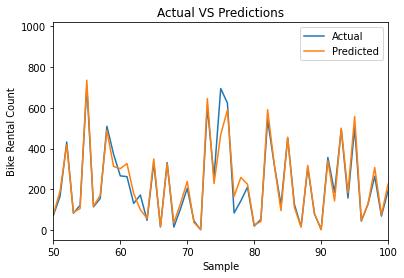

In [89]:
plt.title("Actual VS Predictions")
plt.plot(valid_df.index,valid_df['count'], label= "Actual")
plt.plot(valid_df.index,valid_df['count_predicted'], label= "Predicted")
plt.xlim([50,100])
plt.xlabel("Sample")
plt.ylabel("Bike Rental Count")
plt.legend()
plt.show()

### Prepare Data for Kaggle Submission


In [97]:
df_test = pd.read_csv(df_test_file)
X_test = df_test.iloc[:,1:] 

In [98]:
predict = xgb_regressor.predict(X_test)

df_test['count'] = np.expm1(predict)

In [99]:
df_test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,dayofweek,hour,count
0,2011-01-20 00:00:00,1,0,1,1,-1.235966,-1.440193,-0.421172,1.620888,2011,1,20,3,0,10.167143
1,2011-01-20 01:00:00,1,0,1,1,-1.235966,-1.181711,-0.421172,-1.531139,2011,1,20,3,1,5.365822
2,2011-01-20 02:00:00,1,0,1,1,-1.235966,-1.181711,-0.421172,-1.531139,2011,1,20,3,2,3.042738
3,2011-01-20 03:00:00,1,0,1,1,-1.235966,-1.267682,-0.421172,-0.197558,2011,1,20,3,3,1.889168
4,2011-01-20 04:00:00,1,0,1,1,-1.235966,-1.267682,-0.421172,-0.197558,2011,1,20,3,4,1.649997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,-1.235966,-1.267682,-0.213831,-0.197558,2012,12,31,0,19,331.884644
6489,2012-12-31 20:00:00,1,0,1,2,-1.235966,-1.267682,-0.213831,-0.197558,2012,12,31,0,20,243.230560
6490,2012-12-31 21:00:00,1,0,1,1,-1.235966,-1.267682,-0.213831,-0.197558,2012,12,31,0,21,139.095947
6491,2012-12-31 22:00:00,1,0,1,1,-1.235966,-1.181711,-0.421172,-0.440396,2012,12,31,0,22,114.609642


In [100]:
# df_test[['datetime','count']].to_csv('bikerental_submission_v1.csv',index=False)

### Kaggle Score

0.42254